In [220]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch.nn.modules import Softmax
from torch.nn.modules.activation import ReLU
from torchsummary import summary

import nibabel as nib
import matplotlib.pyplot as plt
import gzip
import tensorflow as tf
import os
import shutil
import numpy as np
from scipy import ndimage
from tensorflow import keras
from tensorflow.keras import layers
import gc

non-stripped


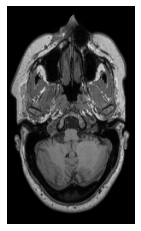

stripped


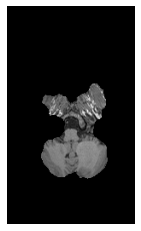

In [2]:
nfilepath = './image_data/BSE_BET_DATA/nifti_files/IXI369-Guys-0924-T1_bet_03.nii'
sfilepath = './image_data/BSE_BET_DATA/nifti_files/IXI369-Guys-0924-T1_bet_8.nii'


def process_scan_file(filepath):
    # Load the image data from the file
    image = nib.load(filepath)

    # Get the image data as a numpy array
    data = image.get_fdata()

    # Select the slice index you want to display or save (e.g., slice 20)
    slice_index = 100
    center = 90

    # Display the image data for the selected slice
    plt.imshow(data[:,center,:], cmap='gray')
    plt.axis('off')
    plt.show()

    # Save the image for the selected slice as JPEG
    # plt.imsave(f'slice_{center}.jpg', data[:,center,:], cmap='gray')

    
print("non-stripped")
process_scan_file(nfilepath)

print("stripped")
process_scan_file(sfilepath)

In [5]:
def unzip_files(folderpath):
    
    for file in os.listdir(folderpath):
        filepath = os.path.join(folderpath, file)
    
        with gzip.open(filepath, 'rb') as f_in:
            outpath = os.path.splitext(filepath)[0]
            print(f"outpath: {outpath} | filename: {file[:-3]}")
            outputfolder = os.path.join("./image_data/BSE_BET_DATA/nifti_files", file[:-3])
            with open(outputfolder, 'wb') as f_out:
                f_out.write(f_in.read())
        print(file)
    

def read_nifti_file(filepath):
    """Read and load volume"""
    # Read file
    scan = nib.load(filepath)
    # Get raw data
    scan = scan.get_fdata()
    return scan

def normalize(volume):
    """Normalize the volume"""
    min = -1000
    max = 400
    volume[volume < min] = min
    volume[volume > max] = max
    volume = (volume - min) / (max - min)
    volume = volume.astype("float32")
    return volume


def resize_volume(img):
    """Resize across z-axis"""
    # Set the desired depth
    desired_depth = 64
    desired_width = 128
    desired_height = 128
    # Get current depth
    current_depth = img.shape[-1]
    current_width = img.shape[0]
    current_height = img.shape[1]
    # Compute depth factor
    depth = current_depth / desired_depth
    width = current_width / desired_width
    height = current_height / desired_height
    depth_factor = 1 / depth
    width_factor = 1 / width
    height_factor = 1 / height
    # Rotate
    img = ndimage.rotate(img, 90, reshape=False)
    # Resize across z-axis
    img = ndimage.zoom(img, (width_factor, height_factor, depth_factor), order=1)
    return img


def display_scan(data):
    # Select the slice index you want to display or save (e.g., slice 20)
    slice_index = 100
    center = 32

    # Display the image data for the selected slice
    plt.imshow(data[:,:,center], cmap='gray')
    plt.axis('off')
    plt.show()

    # Save the image for the selected slice as JPEG
    plt.imsave(f'slice_{center}.jpg', data[:,center,:], cmap='gray')


def process_scan(path):
    """Read and resize volume"""
    # Read scan
    volume = read_nifti_file(path)
    # Normalize
    volume = normalize(volume)
    # Resize width, height and depth
    volume = resize_volume(volume)
    
    return volume

In [6]:
folderpath = "./image_data/BSE_BET_DATA/files"
nifti_folder = "./image_data/BSE_BET_DATA/nifti_files"

# uncomment this if you haven't unzipped the folders
unzip_files(folderpath)

for file in os.listdir(nifti_folder):
    path = os.path.join(nifti_folder, file)
    img = process_scan(path)
    print(img.shape)
    break

outpath: ./image_data/BSE_BET_DATA/files\IXI002-Guys-0828-T1_bet_09.nii | filename: IXI002-Guys-0828-T1_bet_09.nii
IXI002-Guys-0828-T1_bet_09.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI002-Guys-0828-T1_bet_5.nii | filename: IXI002-Guys-0828-T1_bet_5.nii
IXI002-Guys-0828-T1_bet_5.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI002-Guys-0828-T1_bet_75.nii | filename: IXI002-Guys-0828-T1_bet_75.nii
IXI002-Guys-0828-T1_bet_75.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI002-Guys-0828-T1_bse_default.nii | filename: IXI002-Guys-0828-T1_bse_default.nii
IXI002-Guys-0828-T1_bse_default.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI002-Guys-0828-T1_bse_high_s86_r2.nii | filename: IXI002-Guys-0828-T1_bse_high_s86_r2.nii
IXI002-Guys-0828-T1_bse_high_s86_r2.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI002-Guys-0828-T1_bse_less_s5_r1.nii | filename: IXI002-Guys-0828-T1_bse_less_s5_r1.nii
IXI002-Guys-0828-T1_bse_less_s5_r1.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IX

IXI027-Guys-0710-T1_bet_09.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI027-Guys-0710-T1_bet_5.nii | filename: IXI027-Guys-0710-T1_bet_5.nii
IXI027-Guys-0710-T1_bet_5.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI027-Guys-0710-T1_bet_89.nii | filename: IXI027-Guys-0710-T1_bet_89.nii
IXI027-Guys-0710-T1_bet_89.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI027-Guys-0710-T1_bse_default.nii | filename: IXI027-Guys-0710-T1_bse_default.nii
IXI027-Guys-0710-T1_bse_default.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI027-Guys-0710-T1_bse_high_s8_r2.nii | filename: IXI027-Guys-0710-T1_bse_high_s8_r2.nii
IXI027-Guys-0710-T1_bse_high_s8_r2.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI027-Guys-0710-T1_bse_less_s59_r1.nii | filename: IXI027-Guys-0710-T1_bse_less_s59_r1.nii
IXI027-Guys-0710-T1_bse_less_s59_r1.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI033-HH-1259-T1_bet_14.nii | filename: IXI033-HH-1259-T1_bet_14.nii
IXI033-HH-1259-T1_bet_14.nii.gz
outpath: ./imag

IXI044-Guys-0712-T1_bse_high_s76_r2.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI044-Guys-0712-T1_bse_less_s43_r1.nii | filename: IXI044-Guys-0712-T1_bse_less_s43_r1.nii
IXI044-Guys-0712-T1_bse_less_s43_r1.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI045-Guys-0713-T1_bet_17.nii | filename: IXI045-Guys-0713-T1_bet_17.nii
IXI045-Guys-0713-T1_bet_17.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI045-Guys-0713-T1_bet_5.nii | filename: IXI045-Guys-0713-T1_bet_5.nii
IXI045-Guys-0713-T1_bet_5.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI045-Guys-0713-T1_bet_72.nii | filename: IXI045-Guys-0713-T1_bet_72.nii
IXI045-Guys-0713-T1_bet_72.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI045-Guys-0713-T1_bse_default.nii | filename: IXI045-Guys-0713-T1_bse_default.nii
IXI045-Guys-0713-T1_bse_default.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI045-Guys-0713-T1_bse_high_s73_r2.nii | filename: IXI045-Guys-0713-T1_bse_high_s73_r2.nii
IXI045-Guys-0713-T1_bse_high_s73_r2.nii.

IXI066-Guys-0731-T1_bet_04.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI066-Guys-0731-T1_bet_5.nii | filename: IXI066-Guys-0731-T1_bet_5.nii
IXI066-Guys-0731-T1_bet_5.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI066-Guys-0731-T1_bet_81.nii | filename: IXI066-Guys-0731-T1_bet_81.nii
IXI066-Guys-0731-T1_bet_81.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI066-Guys-0731-T1_bse_default.nii | filename: IXI066-Guys-0731-T1_bse_default.nii
IXI066-Guys-0731-T1_bse_default.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI066-Guys-0731-T1_bse_high_s77_r2.nii | filename: IXI066-Guys-0731-T1_bse_high_s77_r2.nii
IXI066-Guys-0731-T1_bse_high_s77_r2.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI066-Guys-0731-T1_bse_less_s59_r1.nii | filename: IXI066-Guys-0731-T1_bse_less_s59_r1.nii
IXI066-Guys-0731-T1_bse_less_s59_r1.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI067-HH-1356-T1_bet_02.nii | filename: IXI067-HH-1356-T1_bet_02.nii
IXI067-HH-1356-T1_bet_02.nii.gz
outpath: ./i

IXI078-Guys-0751-T1_bse_less_s49_r1.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI080-HH-1341-T1_bet_04.nii | filename: IXI080-HH-1341-T1_bet_04.nii
IXI080-HH-1341-T1_bet_04.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI080-HH-1341-T1_bet_5.nii | filename: IXI080-HH-1341-T1_bet_5.nii
IXI080-HH-1341-T1_bet_5.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI080-HH-1341-T1_bet_89.nii | filename: IXI080-HH-1341-T1_bet_89.nii
IXI080-HH-1341-T1_bet_89.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI080-HH-1341-T1_bse_default.nii | filename: IXI080-HH-1341-T1_bse_default.nii
IXI080-HH-1341-T1_bse_default.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI080-HH-1341-T1_bse_high_s84_r2.nii | filename: IXI080-HH-1341-T1_bse_high_s84_r2.nii
IXI080-HH-1341-T1_bse_high_s84_r2.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI080-HH-1341-T1_bse_less_s49_r1.nii | filename: IXI080-HH-1341-T1_bse_less_s49_r1.nii
IXI080-HH-1341-T1_bse_less_s49_r1.nii.gz
outpath: ./image_data/BSE_BET_DAT

IXI095-HH-1390-T1_bse_high_s7_r2.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI095-HH-1390-T1_bse_less_s52_r1.nii | filename: IXI095-HH-1390-T1_bse_less_s52_r1.nii
IXI095-HH-1390-T1_bse_less_s52_r1.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI096-HH-1391-T1_bet_05.nii | filename: IXI096-HH-1391-T1_bet_05.nii
IXI096-HH-1391-T1_bet_05.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI096-HH-1391-T1_bet_5.nii | filename: IXI096-HH-1391-T1_bet_5.nii
IXI096-HH-1391-T1_bet_5.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI096-HH-1391-T1_bet_89.nii | filename: IXI096-HH-1391-T1_bet_89.nii
IXI096-HH-1391-T1_bet_89.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI096-HH-1391-T1_bse_default.nii | filename: IXI096-HH-1391-T1_bse_default.nii
IXI096-HH-1391-T1_bse_default.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI096-HH-1391-T1_bse_high_s78_r2.nii | filename: IXI096-HH-1391-T1_bse_high_s78_r2.nii
IXI096-HH-1391-T1_bse_high_s78_r2.nii.gz
outpath: ./image_data/BSE_BET_DATA/f

IXI109-Guys-0732-T1_bet_14.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI109-Guys-0732-T1_bet_5.nii | filename: IXI109-Guys-0732-T1_bet_5.nii
IXI109-Guys-0732-T1_bet_5.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI109-Guys-0732-T1_bet_86.nii | filename: IXI109-Guys-0732-T1_bet_86.nii
IXI109-Guys-0732-T1_bet_86.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI109-Guys-0732-T1_bse_default.nii | filename: IXI109-Guys-0732-T1_bse_default.nii
IXI109-Guys-0732-T1_bse_default.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI109-Guys-0732-T1_bse_high_s88_r2.nii | filename: IXI109-Guys-0732-T1_bse_high_s88_r2.nii
IXI109-Guys-0732-T1_bse_high_s88_r2.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI109-Guys-0732-T1_bse_less_s51_r1.nii | filename: IXI109-Guys-0732-T1_bse_less_s51_r1.nii
IXI109-Guys-0732-T1_bse_less_s51_r1.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI114-Guys-0737-T1_bet_14.nii | filename: IXI114-Guys-0737-T1_bet_14.nii
IXI114-Guys-0737-T1_bet_14.nii.gz
outpat

IXI129-Guys-0775-T1_bse_high_s88_r2.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI129-Guys-0775-T1_bse_less_s54_r1.nii | filename: IXI129-Guys-0775-T1_bse_less_s54_r1.nii
IXI129-Guys-0775-T1_bse_less_s54_r1.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI131-HH-1527-T1_bet_17.nii | filename: IXI131-HH-1527-T1_bet_17.nii
IXI131-HH-1527-T1_bet_17.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI131-HH-1527-T1_bet_5.nii | filename: IXI131-HH-1527-T1_bet_5.nii
IXI131-HH-1527-T1_bet_5.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI131-HH-1527-T1_bet_86.nii | filename: IXI131-HH-1527-T1_bet_86.nii
IXI131-HH-1527-T1_bet_86.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI131-HH-1527-T1_bse_default.nii | filename: IXI131-HH-1527-T1_bse_default.nii
IXI131-HH-1527-T1_bse_default.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI131-HH-1527-T1_bse_high_s87_r2.nii | filename: IXI131-HH-1527-T1_bse_high_s87_r2.nii
IXI131-HH-1527-T1_bse_high_s87_r2.nii.gz
outpath: ./image_data/BSE_B

IXI146-HH-1389-T1_bse_less_s45_r1.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI148-HH-1453-T1_bet_04.nii | filename: IXI148-HH-1453-T1_bet_04.nii
IXI148-HH-1453-T1_bet_04.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI148-HH-1453-T1_bet_5.nii | filename: IXI148-HH-1453-T1_bet_5.nii
IXI148-HH-1453-T1_bet_5.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI148-HH-1453-T1_bet_8.nii | filename: IXI148-HH-1453-T1_bet_8.nii
IXI148-HH-1453-T1_bet_8.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI148-HH-1453-T1_bse_default.nii | filename: IXI148-HH-1453-T1_bse_default.nii
IXI148-HH-1453-T1_bse_default.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI148-HH-1453-T1_bse_high_s83_r2.nii | filename: IXI148-HH-1453-T1_bse_high_s83_r2.nii
IXI148-HH-1453-T1_bse_high_s83_r2.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI148-HH-1453-T1_bse_less_s54_r1.nii | filename: IXI148-HH-1453-T1_bse_less_s54_r1.nii
IXI148-HH-1453-T1_bse_less_s54_r1.nii.gz
outpath: ./image_data/BSE_BET_DATA/fil

IXI162-HH-1548-T1_bet_02.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI162-HH-1548-T1_bet_5.nii | filename: IXI162-HH-1548-T1_bet_5.nii
IXI162-HH-1548-T1_bet_5.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI162-HH-1548-T1_bet_72.nii | filename: IXI162-HH-1548-T1_bet_72.nii
IXI162-HH-1548-T1_bet_72.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI162-HH-1548-T1_bse_default.nii | filename: IXI162-HH-1548-T1_bse_default.nii
IXI162-HH-1548-T1_bse_default.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI162-HH-1548-T1_bse_high_s84_r2.nii | filename: IXI162-HH-1548-T1_bse_high_s84_r2.nii
IXI162-HH-1548-T1_bse_high_s84_r2.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI162-HH-1548-T1_bse_less_s57_r1.nii | filename: IXI162-HH-1548-T1_bse_less_s57_r1.nii
IXI162-HH-1548-T1_bse_less_s57_r1.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI163-HH-1621-T1_bet_09.nii | filename: IXI163-HH-1621-T1_bet_09.nii
IXI163-HH-1621-T1_bet_09.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI

IXI182-Guys-0792-T1_bet_5.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI182-Guys-0792-T1_bet_85.nii | filename: IXI182-Guys-0792-T1_bet_85.nii
IXI182-Guys-0792-T1_bet_85.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI182-Guys-0792-T1_bse_default.nii | filename: IXI182-Guys-0792-T1_bse_default.nii
IXI182-Guys-0792-T1_bse_default.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI182-Guys-0792-T1_bse_high_s8_r2.nii | filename: IXI182-Guys-0792-T1_bse_high_s8_r2.nii
IXI182-Guys-0792-T1_bse_high_s8_r2.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI182-Guys-0792-T1_bse_less_s44_r1.nii | filename: IXI182-Guys-0792-T1_bse_less_s44_r1.nii
IXI182-Guys-0792-T1_bse_less_s44_r1.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI183-Guys-0791-T1_bet_16.nii | filename: IXI183-Guys-0791-T1_bet_16.nii
IXI183-Guys-0791-T1_bet_16.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI183-Guys-0791-T1_bet_5.nii | filename: IXI183-Guys-0791-T1_bet_5.nii
IXI183-Guys-0791-T1_bet_5.nii.gz
outpath: .

IXI200-Guys-0812-T1_bet_19.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI200-Guys-0812-T1_bet_5.nii | filename: IXI200-Guys-0812-T1_bet_5.nii
IXI200-Guys-0812-T1_bet_5.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI200-Guys-0812-T1_bet_79.nii | filename: IXI200-Guys-0812-T1_bet_79.nii
IXI200-Guys-0812-T1_bet_79.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI200-Guys-0812-T1_bse_default.nii | filename: IXI200-Guys-0812-T1_bse_default.nii
IXI200-Guys-0812-T1_bse_default.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI200-Guys-0812-T1_bse_high_s74_r2.nii | filename: IXI200-Guys-0812-T1_bse_high_s74_r2.nii
IXI200-Guys-0812-T1_bse_high_s74_r2.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI200-Guys-0812-T1_bse_less_s52_r1.nii | filename: IXI200-Guys-0812-T1_bse_less_s52_r1.nii
IXI200-Guys-0812-T1_bse_less_s52_r1.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI202-HH-1526-T1_bet_08.nii | filename: IXI202-HH-1526-T1_bet_08.nii
IXI202-HH-1526-T1_bet_08.nii.gz
outpath: ./i

IXI216-HH-1635-T1_bet_5.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI216-HH-1635-T1_bet_82.nii | filename: IXI216-HH-1635-T1_bet_82.nii
IXI216-HH-1635-T1_bet_82.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI216-HH-1635-T1_bse_default.nii | filename: IXI216-HH-1635-T1_bse_default.nii
IXI216-HH-1635-T1_bse_default.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI216-HH-1635-T1_bse_high_s73_r2.nii | filename: IXI216-HH-1635-T1_bse_high_s73_r2.nii
IXI216-HH-1635-T1_bse_high_s73_r2.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI216-HH-1635-T1_bse_less_s41_r1.nii | filename: IXI216-HH-1635-T1_bse_less_s41_r1.nii
IXI216-HH-1635-T1_bse_less_s41_r1.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI217-HH-1638-T1_bet_16.nii | filename: IXI217-HH-1638-T1_bet_16.nii
IXI217-HH-1638-T1_bet_16.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI217-HH-1638-T1_bet_5.nii | filename: IXI217-HH-1638-T1_bet_5.nii
IXI217-HH-1638-T1_bet_5.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI2

IXI234-IOP-0870-T1_bse_high_s71_r2.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI234-IOP-0870-T1_bse_less_s53_r1.nii | filename: IXI234-IOP-0870-T1_bse_less_s53_r1.nii
IXI234-IOP-0870-T1_bse_less_s53_r1.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI237-Guys-1049-T1_bet_03.nii | filename: IXI237-Guys-1049-T1_bet_03.nii
IXI237-Guys-1049-T1_bet_03.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI237-Guys-1049-T1_bet_5.nii | filename: IXI237-Guys-1049-T1_bet_5.nii
IXI237-Guys-1049-T1_bet_5.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI237-Guys-1049-T1_bet_77.nii | filename: IXI237-Guys-1049-T1_bet_77.nii
IXI237-Guys-1049-T1_bet_77.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI237-Guys-1049-T1_bse_default.nii | filename: IXI237-Guys-1049-T1_bse_default.nii
IXI237-Guys-1049-T1_bse_default.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI237-Guys-1049-T1_bse_high_s88_r2.nii | filename: IXI237-Guys-1049-T1_bse_high_s88_r2.nii
IXI237-Guys-1049-T1_bse_high_s88_r2.nii.gz
o

IXI256-HH-1723-T1_bse_less_s5_r1.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI259-HH-1804-T1_bet_04.nii | filename: IXI259-HH-1804-T1_bet_04.nii
IXI259-HH-1804-T1_bet_04.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI259-HH-1804-T1_bet_5.nii | filename: IXI259-HH-1804-T1_bet_5.nii
IXI259-HH-1804-T1_bet_5.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI259-HH-1804-T1_bet_78.nii | filename: IXI259-HH-1804-T1_bet_78.nii
IXI259-HH-1804-T1_bet_78.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI259-HH-1804-T1_bse_default.nii | filename: IXI259-HH-1804-T1_bse_default.nii
IXI259-HH-1804-T1_bse_default.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI259-HH-1804-T1_bse_high_s79_r2.nii | filename: IXI259-HH-1804-T1_bse_high_s79_r2.nii
IXI259-HH-1804-T1_bse_high_s79_r2.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI259-HH-1804-T1_bse_less_s42_r1.nii | filename: IXI259-HH-1804-T1_bse_less_s42_r1.nii
IXI259-HH-1804-T1_bse_less_s42_r1.nii.gz
outpath: ./image_data/BSE_BET_DATA/f

IXI279-Guys-1044-T1_bet_05.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI279-Guys-1044-T1_bet_5.nii | filename: IXI279-Guys-1044-T1_bet_5.nii
IXI279-Guys-1044-T1_bet_5.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI279-Guys-1044-T1_bet_74.nii | filename: IXI279-Guys-1044-T1_bet_74.nii
IXI279-Guys-1044-T1_bet_74.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI279-Guys-1044-T1_bse_default.nii | filename: IXI279-Guys-1044-T1_bse_default.nii
IXI279-Guys-1044-T1_bse_default.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI279-Guys-1044-T1_bse_high_s72_r2.nii | filename: IXI279-Guys-1044-T1_bse_high_s72_r2.nii
IXI279-Guys-1044-T1_bse_high_s72_r2.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI279-Guys-1044-T1_bse_less_s46_r1.nii | filename: IXI279-Guys-1044-T1_bse_less_s46_r1.nii
IXI279-Guys-1044-T1_bse_less_s46_r1.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI280-HH-1860-T1_bet_03.nii | filename: IXI280-HH-1860-T1_bet_03.nii
IXI280-HH-1860-T1_bet_03.nii.gz
outpath: ./i

IXI294-IOP-0868-T1_bet_15.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI294-IOP-0868-T1_bet_5.nii | filename: IXI294-IOP-0868-T1_bet_5.nii
IXI294-IOP-0868-T1_bet_5.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI294-IOP-0868-T1_bet_83.nii | filename: IXI294-IOP-0868-T1_bet_83.nii
IXI294-IOP-0868-T1_bet_83.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI294-IOP-0868-T1_bse_default.nii | filename: IXI294-IOP-0868-T1_bse_default.nii
IXI294-IOP-0868-T1_bse_default.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI294-IOP-0868-T1_bse_high_s85_r2.nii | filename: IXI294-IOP-0868-T1_bse_high_s85_r2.nii
IXI294-IOP-0868-T1_bse_high_s85_r2.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI294-IOP-0868-T1_bse_less_s59_r1.nii | filename: IXI294-IOP-0868-T1_bse_less_s59_r1.nii
IXI294-IOP-0868-T1_bse_less_s59_r1.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI296-HH-1970-T1_bet_18.nii | filename: IXI296-HH-1970-T1_bet_18.nii
IXI296-HH-1970-T1_bet_18.nii.gz
outpath: ./image_data/BSE_BE

IXI311-Guys-0885-T1_bet_5.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI311-Guys-0885-T1_bet_79.nii | filename: IXI311-Guys-0885-T1_bet_79.nii
IXI311-Guys-0885-T1_bet_79.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI311-Guys-0885-T1_bse_default.nii | filename: IXI311-Guys-0885-T1_bse_default.nii
IXI311-Guys-0885-T1_bse_default.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI311-Guys-0885-T1_bse_high_s88_r2.nii | filename: IXI311-Guys-0885-T1_bse_high_s88_r2.nii
IXI311-Guys-0885-T1_bse_high_s88_r2.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI311-Guys-0885-T1_bse_less_s45_r1.nii | filename: IXI311-Guys-0885-T1_bse_less_s45_r1.nii
IXI311-Guys-0885-T1_bse_less_s45_r1.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI315-IOP-0888-T1_bet_18.nii | filename: IXI315-IOP-0888-T1_bet_18.nii
IXI315-IOP-0888-T1_bet_18.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI315-IOP-0888-T1_bet_5.nii | filename: IXI315-IOP-0888-T1_bet_5.nii
IXI315-IOP-0888-T1_bet_5.nii.gz
outpath: ./im

IXI335-HH-1906-T1_bse_less_s58_r1.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI336-Guys-0904-T1_bet_09.nii | filename: IXI336-Guys-0904-T1_bet_09.nii
IXI336-Guys-0904-T1_bet_09.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI336-Guys-0904-T1_bet_5.nii | filename: IXI336-Guys-0904-T1_bet_5.nii
IXI336-Guys-0904-T1_bet_5.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI336-Guys-0904-T1_bet_74.nii | filename: IXI336-Guys-0904-T1_bet_74.nii
IXI336-Guys-0904-T1_bet_74.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI336-Guys-0904-T1_bse_default.nii | filename: IXI336-Guys-0904-T1_bse_default.nii
IXI336-Guys-0904-T1_bse_default.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI336-Guys-0904-T1_bse_high_s8_r2.nii | filename: IXI336-Guys-0904-T1_bse_high_s8_r2.nii
IXI336-Guys-0904-T1_bse_high_s8_r2.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI336-Guys-0904-T1_bse_less_s56_r1.nii | filename: IXI336-Guys-0904-T1_bse_less_s56_r1.nii
IXI336-Guys-0904-T1_bse_less_s56_r1.nii.gz
ou

IXI353-HH-1996-T1_bse_high_s7_r2.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI353-HH-1996-T1_bse_less_s51_r1.nii | filename: IXI353-HH-1996-T1_bse_less_s51_r1.nii
IXI353-HH-1996-T1_bse_less_s51_r1.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI359-Guys-0918-T1_bet_13.nii | filename: IXI359-Guys-0918-T1_bet_13.nii
IXI359-Guys-0918-T1_bet_13.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI359-Guys-0918-T1_bet_5.nii | filename: IXI359-Guys-0918-T1_bet_5.nii
IXI359-Guys-0918-T1_bet_5.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI359-Guys-0918-T1_bet_79.nii | filename: IXI359-Guys-0918-T1_bet_79.nii
IXI359-Guys-0918-T1_bet_79.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI359-Guys-0918-T1_bse_default.nii | filename: IXI359-Guys-0918-T1_bse_default.nii
IXI359-Guys-0918-T1_bse_default.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI359-Guys-0918-T1_bse_high_s73_r2.nii | filename: IXI359-Guys-0918-T1_bse_high_s73_r2.nii
IXI359-Guys-0918-T1_bse_high_s73_r2.nii.gz
outpat

IXI375-Guys-0925-T1_bet_86.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI375-Guys-0925-T1_bse_default.nii | filename: IXI375-Guys-0925-T1_bse_default.nii
IXI375-Guys-0925-T1_bse_default.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI375-Guys-0925-T1_bse_high_s89_r2.nii | filename: IXI375-Guys-0925-T1_bse_high_s89_r2.nii
IXI375-Guys-0925-T1_bse_high_s89_r2.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI375-Guys-0925-T1_bse_less_s51_r1.nii | filename: IXI375-Guys-0925-T1_bse_less_s51_r1.nii
IXI375-Guys-0925-T1_bse_less_s51_r1.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI377-Guys-0937-T1_bet_02.nii | filename: IXI377-Guys-0937-T1_bet_02.nii
IXI377-Guys-0937-T1_bet_02.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI377-Guys-0937-T1_bet_5.nii | filename: IXI377-Guys-0937-T1_bet_5.nii
IXI377-Guys-0937-T1_bet_5.nii.gz
outpath: ./image_data/BSE_BET_DATA/files\IXI377-Guys-0937-T1_bet_86.nii | filename: IXI377-Guys-0937-T1_bet_86.nii
IXI377-Guys-0937-T1_bet_86.nii.gz
outpat

KeyboardInterrupt: 

# Break up the Nifti_files folder into two different folders: recognizable and other
Recognizable will be known as non_strip, and other will be known as stripped

In [10]:

nifti_folder = "./image_data/BSE_BET_DATA/nifti_files"

csv = np.loadtxt("./image_data/BSE_BET_DATA/labels.csv", delimiter=",", dtype=str)

recognizable = []
for item in csv:
    if item[1] == "Yes":
        recognizable.append(item[0])

outputfolder = "./image_data/BSE_BET_DATA/recognizable_features"
if not os.path.exists(outputfolder):
    os.makedirs(outputfolder)
    
nonfolder = "./image_data/BSE_BET_DATA/non_features"
if not os.path.exists(nonfolder):
    os.makedirs(nonfolder)

# for file in os.listdir(nifti_folder):
#     if file in recognizable:
#         filepath = os.path.join(nifti_folder, file)
#         outputpath = os.path.join(outputfolder, file)
#         with open(filepath, 'rb') as f_in, open(outputpath, 'wb') as f_out:
#             shutil.copyfileobj(f_in, f_out)
    
#     else:
#         filepath = os.path.join(nifti_folder, file)
#         nonpath = os.path.join(nonfolder, file)
#         with open(filepath, 'rb') as f_in, open(nonpath, 'wb') as f_out:
#             shutil.copyfileobj(f_in, f_out)


In [7]:
non_stripped_folder = os.listdir("./image_data/BSE_BET_DATA/recognizable_features")
stripped_folder = os.listdir("./image_data/BSE_BET_DATA/non_features")

non_strip = np.array([process_scan(os.path.join("./image_data/BSE_BET_DATA/recognizable_features",path)) for path in non_stripped_folder[:100]])
stripped = np.array([process_scan(os.path.join("./image_data/BSE_BET_DATA/non_features",path)) for path in stripped_folder[:100]])

In [8]:
# correctly parse labels
csv = np.loadtxt("./image_data/BSE_BET_DATA/labels.csv", delimiter=",", dtype=str)

recognizable = []
unrecog = []
for item in csv:
    if item[1] == "Yes" and item[2] == "No":
        recognizable.append(item[0])
    else:
        unrecog.append(item[0])
        

In [9]:
# 1 == non_stripped and 0 == stripped
non_strip_labels = np.array([1 for _ in range(len(non_strip))])
strip_labels = np.array([0 for _ in range(len(stripped))])

# split the training data into 70-30 ratio for training and validation
x_train = np.concatenate((stripped[:70], non_strip[:70]),axis=0)
y_train = np.concatenate((strip_labels[:70], non_strip_labels[:70]),axis=0)
x_val = np.concatenate((stripped[70:], non_strip[70:]),axis=0)
y_val = np.concatenate((strip_labels[70:], non_strip_labels[70:]),axis=0)

print(f"x train: {y_train.shape} | x val: {x_val.shape}")

x train: (140,) | x val: (60, 128, 128, 64)


In [232]:
batch_size = 4

# turn x_train and y_train into a dataloader
x_train = torch.tensor(x_train, dtype=torch.float32)
print(x_train.shape)
#x_train = np.transpose(x_train, (0,3,1,2)) 
print(x_train.shape)
y_train = torch.tensor(y_train, dtype=torch.long) # shape is (140)
print(y_train.shape)
train_ds = TensorDataset(x_train, y_train)
train_dl = DataLoader(train_ds, batch_size=batch_size, shuffle=True) #creates shape: (2, 64, 128, 128)


# turn x_val and y_val into a dataloader
x_val = torch.tensor(x_val, dtype=torch.float32)
#x_val = np.transpose(x_val, (0,3,1,2))
y_val = torch.tensor(y_val, dtype=torch.long) # shape is 60
val_ds = TensorDataset(x_val, y_val)
val_dl = DataLoader(val_ds, batch_size=batch_size, shuffle=True)

torch.Size([140, 128, 64, 128])
torch.Size([140, 128, 64, 128])
torch.Size([140])


C:\Users\jbinzLocal\AppData\Local\Temp\ipykernel_9812\3799328645.py:4: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_train = torch.tensor(x_train, dtype=torch.float32)
C:\Users\jbinzLocal\AppData\Local\Temp\ipykernel_9812\3799328645.py:8: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  y_train = torch.tensor(y_train, dtype=torch.long) # shape is (140)
C:\Users\jbinzLocal\AppData\Local\Temp\ipykernel_9812\3799328645.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  x_val = torch.tensor(x_val, dtype=torch.float32)
C:\Users\jbinzLocal\App

# 3D PyTorch Model

In [233]:

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class neuro_model(nn.Module):
    def __init__(self):
        super(neuro_model, self).__init__()
        
        # Define the convolutional layers
        self.conv1 = nn.Conv3d(1, 16, kernel_size=(3, 3, 3), padding=1)
        self.conv2 = nn.Conv3d(16, 32, kernel_size=(3, 3, 3), padding=1)
        self.conv3 = nn.Conv3d(32, 64, kernel_size=(3, 3, 3), padding=1)
        
        # Define the max pooling layers
        self.pool = nn.MaxPool3d((2, 2, 2))
        
        # Define the fully connected layers
        self.fc1 = nn.Linear(2**17, 128)
        self.fc2 = nn.Linear(128, 2)
        
        # Define the activation function
        self.relu = nn.ReLU()
        
    def forward(self, x):
        # Apply the convolutional layers and activation function
        x = x.unsqueeze(1) # unsqueeze to add channels 1
        #print("input after unsqueeze:", x.shape)
        x = self.conv1(x)
        
        x = self.relu(x)
        x = self.pool(x)
        #print("shape after first conv layer",x.shape)
        x = self.relu(self.conv2(x))
        x = self.pool(x)
        x = self.relu(self.conv3(x))
        x = self.pool(x)
        #print("shape after all conv layers",x.shape)
        # Reshape the tensor for the fully connected layers
        x = x.view(x.size(0), -1)
        #print("shape after view", x.shape)
        
        # Apply the fully connected layers and activation function
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        
        
        #print(x.shape)
        return x
    

In [237]:
num_epochs = 5

def fit(model):
    criterion = nn.CrossEntropyLoss()
    optim = torch.optim.Adam(model.parameters(), lr=0.001)
    
    for epoch in range(num_epochs):
        
        for step, (inputs, labels) in enumerate(train_dl):
            inputs = inputs.to(device)
            labels = labels.to(device)
            output = model(inputs)
            print(output)
            print(labels)
            loss = criterion(output, labels)
            
            optim.zero_grad()
            loss.backward()
            optim.step()
            
            if step/len(train_dl) == 0:
                print(f"epoch: {epoch+1} | step: {step} | loss: {loss.item():4f}")
        

In [238]:
torch.cuda.empty_cache()
gc.collect()
model = neuro_model()
model.to(device)
fit(model)

tensor([[-0.0355, -0.0571],
        [-0.0353, -0.0564],
        [-0.0350, -0.0586],
        [-0.0346, -0.0588]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([1, 0, 0, 0], device='cuda:0')
epoch: 1 | step: 0 | loss: 0.687284
tensor([[ 4.4472, -3.0346],
        [ 4.9471, -3.3672],
        [ 4.7845, -3.2587],
        [ 4.7108, -3.2132]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([0, 1, 1, 1], device='cuda:0')
tensor([[0.0107, 0.1080],
        [0.0369, 0.0768],
        [0.0412, 0.0763],
        [0.0464, 0.0723]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([1, 0, 0, 0], device='cuda:0')
tensor([[-0.2335,  0.1912],
        [-0.2602,  0.2238],
        [-0.2302,  0.1865],
        [-0.2571,  0.2205]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([0, 1, 0, 1], device='cuda:0')
tensor([[-0.1529,  0.0744],
        [-0.1455,  0.0656],
        [-0.1469,  0.0672],
        [-0.1651,  0.0894]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([0, 0, 0, 1], device='cuda:0')
te

tensor([[-0.0634, -0.0774],
        [-0.0741, -0.0636],
        [-0.0711, -0.0666],
        [-0.0222, -0.1263]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([1, 1, 1, 0], device='cuda:0')
tensor([[-0.0838, -0.0629],
        [-0.0869, -0.0609],
        [-0.0567, -0.0925],
        [-0.0871, -0.0609]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([1, 1, 0, 1], device='cuda:0')
tensor([[-0.0490, -0.1087],
        [-0.1073, -0.0514],
        [-0.0989, -0.0540],
        [-0.1042, -0.0521]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([0, 1, 1, 1], device='cuda:0')
tensor([[-0.1312, -0.0285],
        [-0.0590, -0.1141],
        [-0.0514, -0.1220],
        [-0.1220, -0.0341]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([1, 0, 0, 1], device='cuda:0')
tensor([[-0.0501, -0.1421],
        [-0.0657, -0.1246],
        [-0.1315, -0.0399],
        [-0.0456, -0.1487]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([0, 0, 1, 0], device='cuda:0')
tensor([[-0.0568, -0.1554],
  

tensor([[ 0.5613, -1.9028],
        [ 0.0568, -1.4107],
        [ 0.5343, -1.9047],
        [-0.2536, -1.0080]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([0, 0, 0, 1], device='cuda:0')
tensor([[ 0.3397, -1.7352],
        [-1.2168, -0.0263],
        [-1.3836,  0.1976],
        [-1.1587, -0.1282]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([0, 1, 1, 1], device='cuda:0')
tensor([[-2.1033,  0.8266],
        [-1.9366,  0.6717],
        [-1.9126,  0.6677],
        [-1.7978,  0.5713]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([1, 1, 1, 1], device='cuda:0')
tensor([[-1.4994,  0.0377],
        [-0.9658, -0.4768],
        [-2.6345,  1.4231],
        [-1.0189, -0.5138]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([0, 0, 1, 0], device='cuda:0')
tensor([[-2.1855,  1.0356],
        [-0.3081, -1.1194],
        [-0.3761, -1.0679],
        [-1.8757,  0.6561]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([1, 0, 0, 1], device='cuda:0')
tensor([[-0.0654, -1.2317],
  

tensor([[ 1.5753, -6.0348],
        [ 1.5271, -5.8617],
        [-3.6614, -0.0169],
        [-3.8353,  0.1151]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([0, 0, 1, 1], device='cuda:0')
tensor([[ 1.8588, -6.6324],
        [-4.4877,  0.4660],
        [-3.9079, -0.1493],
        [-3.4135, -0.7321]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([0, 1, 1, 1], device='cuda:0')
tensor([[ 1.5317, -6.6247],
        [-4.7384,  0.2864],
        [ 1.8589, -6.9033],
        [-4.2774, -0.1263]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([0, 1, 0, 1], device='cuda:0')
tensor([[-4.3371, -0.1882],
        [-4.5582,  0.1331],
        [-0.9681, -3.8869],
        [ 1.5536, -6.8798]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([1, 1, 1, 0], device='cuda:0')
tensor([[-5.6671,  1.4130],
        [-6.5123,  2.4803],
        [-5.6024,  1.5477],
        [-0.2068, -4.9751]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([1, 1, 1, 0], device='cuda:0')
tensor([[-8.0711,  4.4945],
  

In [257]:
correct = 0
total = 0

with torch.no_grad():
    for data in val_dl:
        inp, val_outp = data
        inp, val_outp = inp.cuda(), val_outp.cuda()
        out = model(inp)
        # shape (batch, 2)
        
        _, pred = torch.max(out, 1)
        
        total += val_outp.size(0)
        correct += (pred == val_outp).sum().item()
        
print(f'Accuracy: {100*correct//total}%')

Accuracy: 60%
